In [1]:
#NB to Reader: .ipynb is a Jupyter Notebook format.
#Original Model by Cheng et al 2015
#The Following is printed at the top of the justTLR_MyD88_SELFACTIVATING.jl file which contains the function for the model.
#The model is defined by three .csv files, and assembled into the model file before being run:

#file edited by reorderModel.jl to reorder the model species.

#######################################################
# Generated programmatically by CSV2JuliaDiffEq.      #
# http://github.com/SiFTW/CSV2JuliaDiffEq             #
#######################################################
# generated from:
#    reactions file: reactions.csv
#    parameters file file: parameters.csv
#    rate law file: rateLaws.csv
#
# Statistics:
#    Equations:26
#    Parameters:50
#######################################################

In [2]:
using DifferentialEquations, Plots
pwd()

"C:\\Users\\bsms9jt3\\OneDrive - University of Brighton\\Documents\\Julia\\Review MYD88 Figures\\Publish Quality"

In [3]:
# Graph
function plotallspeciesn(phase2_sollist,tspan)
	specie_names=["LPS","CD14","CD14LPS","TLR4pm","TLR4LPSpm","CD14LPSen","TLR4en","TLR4LPSen","MYD88","MYD88*","TRIF","TRIF*","TRAF6","TRAF6*","IKKK","IKKK*","IKK","IKK*","IKKi","TBK1","TBK1*","IRF3","IRF3*","IRF3n","IRF3n*"]
    subplotlist=[]
    if length(phase2_sollist) != length(phase1_sollist)
        println("unequal number of phase1 and phase2 solution vectors")
    end
    yvaluelistoflists=[]

    for j = 1:25
        yvaluelistoflists=[]
        for iter in range(1,length(phase2_sollist),step=1)
            yvalues=[]
            # for h in range(9900,10000,step=1) #100 timepoints pre stimulus are taken
            #     b=phase1_sollist[iter](h)
            #     push!(yvalues,b[j])
            # end
			if tspan==false
				for i in sol.t
					local a=phase2_sollist[iter](i)
					push!(yvalues,a[j])
				end
			else
	            for i in range(tspan[1],tspan[2],step=1)
	                local a=phase2_sollist[iter](i)
	                push!(yvalues,a[j])
	            end
			end
            push!(yvaluelistoflists,yvalues)
        end
         #make graph
		# x=tspan[1]:tspan[2]
		colorMap=Dict("WT"=>RGB(0,191/256,0),"L265P"=>RGB(128/256,0,128/256))
		colours=colorMap
		plot(yvaluelistoflists,title=specie_names[j],legend=:left,color_palette=[RGB(0,191/256,0),RGB(128/256,0,128/256)])
		# xlims!(tspan[1],tspan[2])
        push!(subplotlist,current()) #most recent graph appended
    end
    return subplotlist
end

plotallspeciesn (generic function with 1 method)

In [4]:
#bar chart 
function barallspeciesfinaln(phase2_sollist)
	specie_names=["LPS","CD14","CD14LPS","TLR4pm","TLR4LPSpm","CD14LPSen","TLR4en","TLR4LPSen","MYD88","MYD88*","TRIF","TRIF*","TRAF6","TRAF6*","IKKK","IKKK*","IKK","IKK*","IKKi","TBK1","TBK1*","IRF3","IRF3*","IRF3n","IRF3n*"]
    subplotlist=[]
    yvaluelistoflists=[]
	sims=["WT","L265P"]

	# colorMap=Dict("WT"=>RGB(0/256,100/256,0/256),"L265P"=>RGB(200/256,191/256,230/256))
	colorMap=Dict("WT"=>RGB(0,191/256,0),"L265P"=>RGB(128/256,0,128/256))
	colours=[colorMap[i] for i in sims]
    for j = 1:25
        finalvalues=[]
        for iter in range(1,length(phase2_sollist),step=1)
	        local a=phase2_sollist[iter][end][j]
            push!(finalvalues,a)
        end
		ub=maximum(finalvalues)*1.2
		lb=-0.2*ceil(ub,sigdigits=1)
		ylimz=(lb,ceil(ub,sigdigits=1))
		# ticks = round.(range(0,ub,length = 5),digits=1)
		ticks = (range(lb,ceil(ub,sigdigits=1),length = 3), string.(round.(range(lb,ceil(ub,sigdigits=1),length = 3),sigdigits=2)))
		ticks[2][end] = string(ceil(ub,sigdigits=1))
		if maximum(ticks[1])<1e-6
			lb=ceil(1e-10,sigdigits=1)
			ticks=[-2e-11, 0, 1e-10],["-2e-11","0.0","1e-10"]
			ylimz=(-2e-11,1e-10)
			finalvalues[end-1]=1e-13
			finalvalues[end]=1e-13
			bar(["WT","L265P"],finalvalues,colour=colours,title=specie_names[j],legend=:left,yticks=ticks,ylims=ylimz,ytickfontsize=15)
		else
		bar(["WT","L265P"],finalvalues,colour=colours,title=specie_names[j],legend=:left#=,yticks=ticks=#,ylims=ylimz,ytickfontsize=15)
		end
		# bar([finalvalues,title=specie_names[j],legend=:left)
        push!(subplotlist,current()) #most recent graph appended
    end
    return subplotlist
end

barallspeciesfinaln (generic function with 1 method)

In [5]:
symsNew = ["LPS", "CD14", "CD14LPS", "TLR4", "TLR4LPS", "CD14LPSen", "TLR4en", "TLR4LPSen", "MYD88", "MYD88s", "TRIF", "TRIFs", "TRAF6", "TRAF6s", "IKKK_off", "IKKK_on", "IKK_off", "IKK_on", "IKK_i", "TBK1", "TBK1s", "IRF3", "IRF3s", "IRF3n", "IRF3ns", "cbswitch"]
function reorderModel(InputFileName,OutputFileName,symsNew)
    # this function takes an input model and and output file name and fixes the species at index = index so that it does not change
    # the new file is the same as the input file except dx_i/dt = 0 for species where i=index.
    # example call fixing the first species in a model:
    # include("utilityFunctions/fixSpecies.jl")
    # fixSpecies("modelFiles/apoptosis/odeApoptosis.jl","modelFiles/apoptosis/odeApoptosisFixed.jl",1)
    
    outputArray=["#file edited by reorderModel.jl to reorder the model species.\n"]
    #go through input file and save each line to an output array
    #only change the line that starts with the index we're looking for
    numberOfSpecies=length(symsNew)
    
    speciesEquationDict=Dict()
    nextLineSpecies=""
    functionDefinitionReached=false
    #lets go through the file line by line
    open(InputFileName) do f
        for i in enumerate(eachline(f))
            #this line's contents
            thisLine=i[2]
            
            if !functionDefinitionReached
                push!(outputArray,thisLine)
                functionDefinitionReached=startswith(strip(thisLine),"function")
                continue
            end
            #this will get the contents of the line if it's an equation or variable definition
            thisLineSplit=split(strip(thisLine),"=")
            #this will get the contents of the line if it's a code comment
            commentLine=split(strip(thisLine),"#")
            
            #lets check if this is a comment line where the only contents are one of the symbols
            if((length(commentLine)>1)&& (commentLine[2] in symsNew))
                #if we've found a species comment before an equation just make a note of the species so know what the next line represents
                nextLineSpecies=commentLine[2]
                continue
            end
            #if we set next line species on the previous iteration this line is an equation for that species, so save it to the dictionary
            if !isempty(nextLineSpecies)
                speciesEquationDict[nextLineSpecies]=thisLineSplit[2]
                nextLineSpecies=""
                continue
            end 
        end
            
    end
    #loop through all the variable definitions and put them in the right order
    for thisSymEnum in enumerate(symsNew)
        thisSymIndex=thisSymEnum[1]
        thisSymName=thisSymEnum[2]
        #cMyct=maximum([y[1],0])
        thisLine="\t"*thisSymName*"=maximum([y["*string(thisSymIndex)*"],0])"
        push!(outputArray,thisLine)
    end
        
    #loop through all the equations and put them in the right order
    for thisSymEnum in enumerate(symsNew)
        thisSymIndex=thisSymEnum[1]
        thisSymName=thisSymEnum[2]
        #	#cMyct
        #   dy[1]= + 1.0
        commentLine="\t#"*thisSymName
        push!(outputArray,commentLine)
        thisLine="\tdy["*string(thisSymIndex)*"]="*speciesEquationDict[thisSymName]
        push!(outputArray,thisLine)
    end
        
    push!(outputArray,"end")

    #now write the output array to the output file
    open(OutputFileName,"w") do f
        for line in outputArray
            write(f, line*"\n")
        end

    end
end

reorderModel (generic function with 1 method)

In [6]:
### set up where CSV2Julia is
locationOfCSV2Julia="csv2model.py"

reactionsFile="reactions.csv"
parametersFile="parameters.csv"
rateLawsFile="rateLaws.csv"
#build a command to execute csv2julia
location=[locationOfCSV2Julia]
thisModelName="justTLR_MyD88_SELFACTIVATING.jl"

arguments=[reactionsFile, parametersFile, rateLawsFile,thisModelName]
cmd=`python3 $locationOfCSV2Julia $arguments`
run(cmd)

# filename="C:\\Users\\bsms9jt3\\OneDrive - University of Brighton\\Documents\\Julia\\review MYD88 Figures\\Publish Quality\\"
reorderModel("justTLR_MyD88_SELFACTIVATING.jl", "justTLR_MyD88_SELFACTIVATING.jl", symsNew)
include("justTLR_MyD88_SELFACTIVATING.jl")

inline
Running CSV2JuliaDiffEq with parameters hard-coded into the CSV file, if this is not correct, re-run with the 5th argument set to 'scan'
Opening rateLaws.csv as rate law file
Opening parameters.csv as parameters file
Opening reactions.csv as reactions file


odeFile (generic function with 1 method)

In [7]:
#callbacks (always triggered)
function condition(odeFile,t,integrator)
   t-0
end
function affect!(integrator)
    #cbswitch for delayed TLR4LPSen degradation
    integrator.u[26]=1
end

affect! (generic function with 1 method)

In [8]:
#problem definition
u0 = [0, 0.08, 0, 0, 0.0001, 0, 0, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1, 0, 0.1, 0, 0, 0, 0]
u0[17]=0.1
u0test=zeros(26)
LPSinit=0.000
tspan=(0.0,60*18)

(0.0, 1080)

In [9]:
#problem running
sollist=[]
phase1_sollist=[]
for myd88_selfactivation in [0,500]
    paramvar=myd88_selfactivation
    #     if you wish to run from steady state let u0_phase2=phase1_sol[end]
    #     phase1_prob=DiffEqBase.ODEProblem(odeFile, u0test, (0.0,100), paramvar; maxiters=1e6)
    #     phase1_sol=DiffEqBase.solve(phase1_prob)
    # 	push!(phase1_sollist, phase1_sol)
    # 	u0_phase2=phase1_sol[end]

    u0_phase2=u0
	u0_phase2[1]=LPSinit
	prob=DiffEqBase.ODEProblem(odeFile, u0_phase2, tspan, paramvar; maxiters=1e6)

	cb=ContinuousCallback(condition,affect!,nothing)
	cbs=CallbackSet(cb)
	sol=DiffEqBase.solve(prob, callback=cb)
	push!(sollist, sol)
end

unequal number of phase1 and phase2 solution vectors


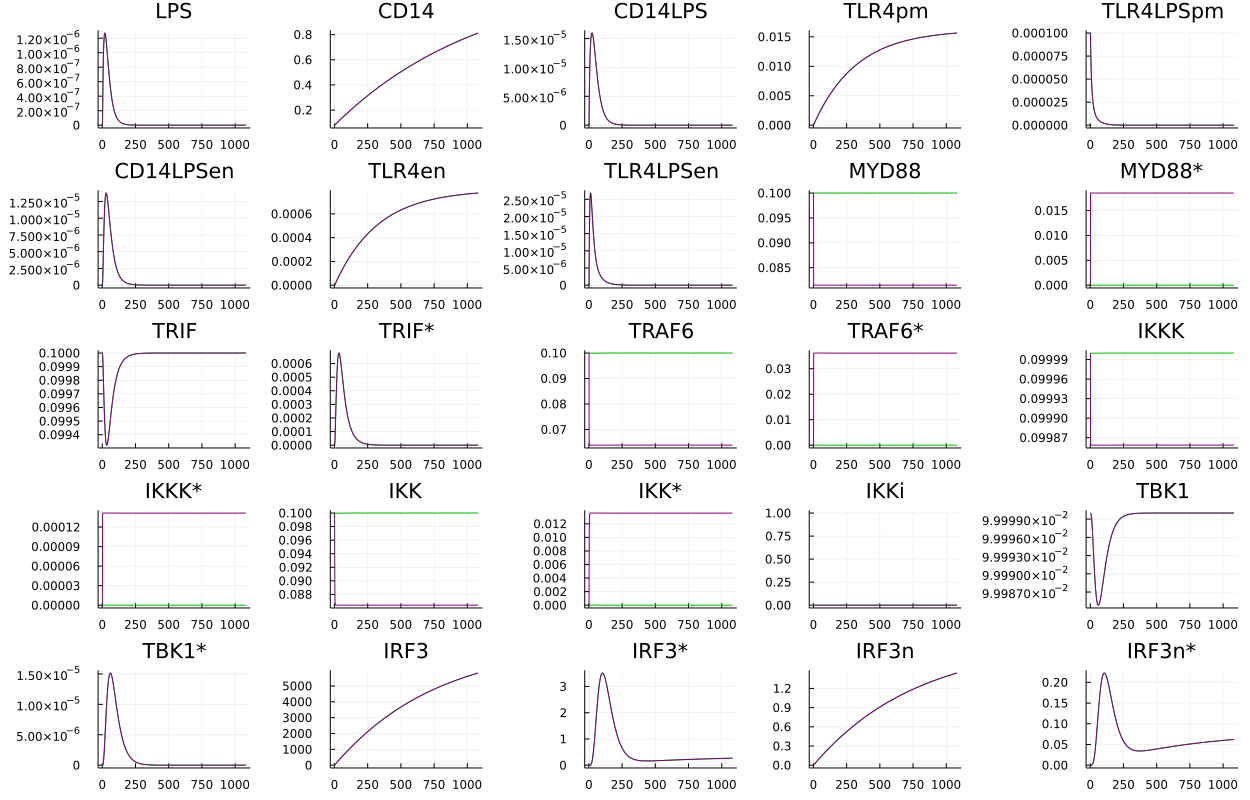

In [10]:
subplotlist=plotallspeciesn(sollist,tspan)
plot(subplotlist[1],subplotlist[2],subplotlist[3],subplotlist[4],subplotlist[5],subplotlist[6],subplotlist[7],subplotlist[8],subplotlist[9],subplotlist[10],subplotlist[11],subplotlist[12],subplotlist[13],subplotlist[14],subplotlist[15],subplotlist[16],subplotlist[17],subplotlist[18],subplotlist[19],subplotlist[20],subplotlist[21],subplotlist[22],subplotlist[23],subplotlist[24],subplotlist[25],size=[1250,800],linewidth=1,show=true,legend=:none)
current()
# savefig("allspecies")

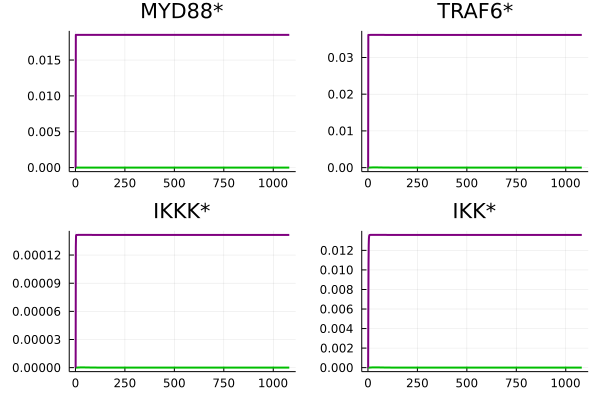

In [11]:
plot(subplotlist[10],subplotlist[14],subplotlist[16],subplotlist[18],linewidth=2)
plot!(legend=:none)

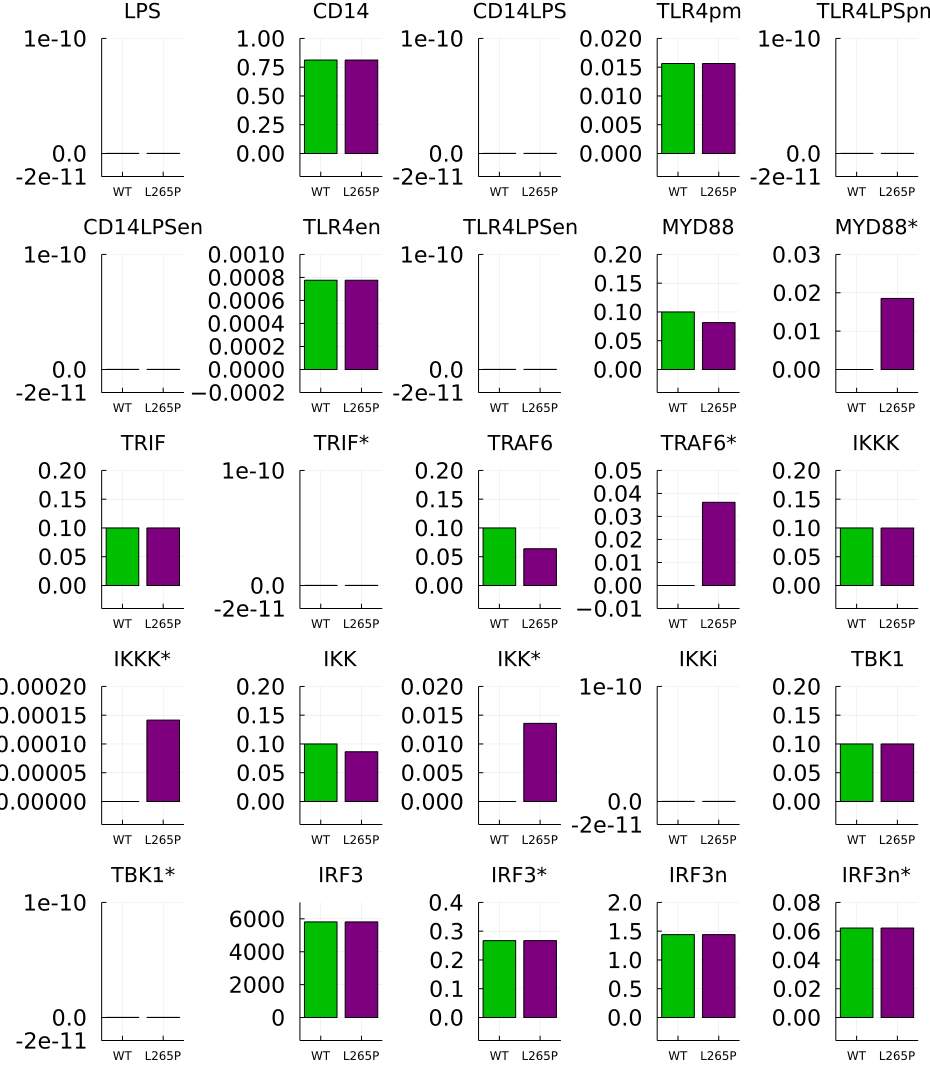

In [12]:
testplots=barallspeciesfinaln(sollist)
plot(testplots[1],testplots[2],testplots[3],testplots[4],testplots[5],testplots[6],testplots[7],testplots[8],testplots[9],testplots[10],testplots[11],testplots[12],testplots[13],testplots[14],testplots[15],testplots[16],testplots[17],testplots[18],testplots[19],testplots[20],testplots[21],testplots[22],testplots[23],testplots[24],testplots[25],size=[1550,1800]*0.6,legend=:none)